# Time series analysis of the GDP data

## Importing data and libraries 

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
path = r'/Users/alexbor/Desktop/Data Analytics/Immersion/Submissions/6. Advanced Analytics/Project_Waste in the world'

In [3]:
#Import dataframes

df_all = pd.read_csv(os.path.join(path,'Prepared data','Complete_Dataset_without_0_emissions_with_extreme_outliers.csv'), index_col = False)


## Data cleaning and wrangling

In [4]:
df_all.head()

,Unnamed: 0.1,Unnamed: 0,Country,Year,Type of emissions,Gas type,"Emissions quantity, tonnes","Total population, thousands",Population density,GDP per capita,WMG,Emissions by year & country,GDP per cap. category,Country category by emissions
0,0,0,Aruba,2017,solid-waste-disposal,ch4,487.0,105.0,585.769,29329.0,NaN,55031.0,High GDP per cap.,Low emissions country
1,1,1,Aruba,2017,solid-waste-disposal,co2e_100yr,13636.0,105.0,585.769,29329.0,NaN,55031.0,High GDP per cap.,Low emissions country
2,2,2,Aruba,2017,solid-waste-disposal,co2e_20yr,40908.0,105.0,585.769,29329.0,NaN,55031.0,High GDP per cap.,Low emissions country
3,3,3,Aruba,2018,solid-waste-disposal,co2e_20yr,41244.0,105.0,588.675,30220.0,NaN,55483.0,High GDP per cap.,Low emissions country
4,4,4,Afganistan,2015,solid-waste-disposal,ch4,21000.0,NaN,NaN,NaN,NaN,2373000.0,NaN,Insignificant emissions country


In [5]:
#Creating a subset with necessary columns

df_all_sub = df_all[['Country','Year', 'GDP per capita']]


In [6]:
df_all_sub.head()

,Country,Year,GDP per capita
0,Aruba,2017,29329.0
1,Aruba,2017,29329.0
2,Aruba,2017,29329.0
3,Aruba,2018,30220.0
4,Afganistan,2015,NaN


In [7]:
#Replacing the "Year" data values to the necessary format

df_all_sub['Year'] = df_all_sub['Year'].replace(2015, '2015-01-01')


In [8]:
df_all_sub['Year'] = df_all_sub['Year'].replace(2016, '2016-01-01')


In [9]:
df_all_sub['Year'] = df_all_sub['Year'].replace(2017, '2017-01-01')


In [10]:
df_all_sub['Year'] = df_all_sub['Year'].replace(2018, '2018-01-01')


In [11]:
df_all_sub['Year'] = df_all_sub['Year'].replace(2019, '2019-01-01')


In [12]:
df_all_sub['Year'] = df_all_sub['Year'].replace(2020, '2020-01-01')


In [13]:
df_all_sub['Year'] = df_all_sub['Year'].replace(2021, '2021-01-01')


In [14]:
df_all_sub.head()

,Country,Year,GDP per capita
0,Aruba,2017-01-01,29329.0
1,Aruba,2017-01-01,29329.0
2,Aruba,2017-01-01,29329.0
3,Aruba,2018-01-01,30220.0
4,Afganistan,2015-01-01,NaN


In [15]:
df_all_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4536 entries, 0 to 4535
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         4536 non-null   object 
 1   Year            4536 non-null   object 
 2   GDP per capita  4116 non-null   float64
dtypes: float64(1), object(2)
memory usage: 106.4+ KB


In [16]:
#Changing the data type of the Year column to 'datetime'
df_all_sub['Year'] = pd.to_datetime(df_all_sub['Year'])


In [17]:
#Grouping the data on Emissions by Year and Country
grouped_by_year_1 = df_all_sub.groupby(['Country', 'Year'])['GDP per capita'].sum()


In [18]:
#Reseting index 
grouped_by_year_1 = grouped_by_year_1.reset_index()

In [19]:
grouped_by_year_1

,Country,Year,GDP per capita
0,Afganistan,2015-01-01,0.0
1,Afganistan,2016-01-01,0.0
2,Afganistan,2017-01-01,0.0
3,Afganistan,2018-01-01,0.0
4,Afganistan,2019-01-01,0.0
...,...,...,...
1507,Zimbabwe,2017-01-01,4482.0
1508,Zimbabwe,2018-01-01,4710.0
1509,Zimbabwe,2019-01-01,4413.0
1510,Zimbabwe,2020-01-01,4146.0


In [20]:
#Deleting the unnecessary column "Country" from the subset
grouped_by_year_1 = grouped_by_year_1.drop(columns=['Country'])


In [21]:
#Grouping the data on Emissions by Year 
grouped_by_year_1 = grouped_by_year_1.groupby(['Year'])['GDP per capita'].sum()

In [22]:
#Reseting the index
grouped_by_year_1 = grouped_by_year_1.reset_index()

In [23]:
grouped_by_year_1

,Year,GDP per capita
0,2015-01-01,8284542.0
1,2016-01-01,8332722.0
2,2017-01-01,8816331.0
3,2018-01-01,9354603.0
4,2019-01-01,9278541.0
5,2020-01-01,8549835.0
6,2021-01-01,9636129.0


In [24]:
#Converting the column "Year" into index 
grouped_by_year_1.set_index('Year', inplace=True)


In [25]:
grouped_by_year_1

,GDP per capita
Year,
2015-01-01,8284542.0
2016-01-01,8332722.0
2017-01-01,8816331.0
2018-01-01,9354603.0
2019-01-01,9278541.0
2020-01-01,8549835.0
2021-01-01,9636129.0


## Plotting the time series line

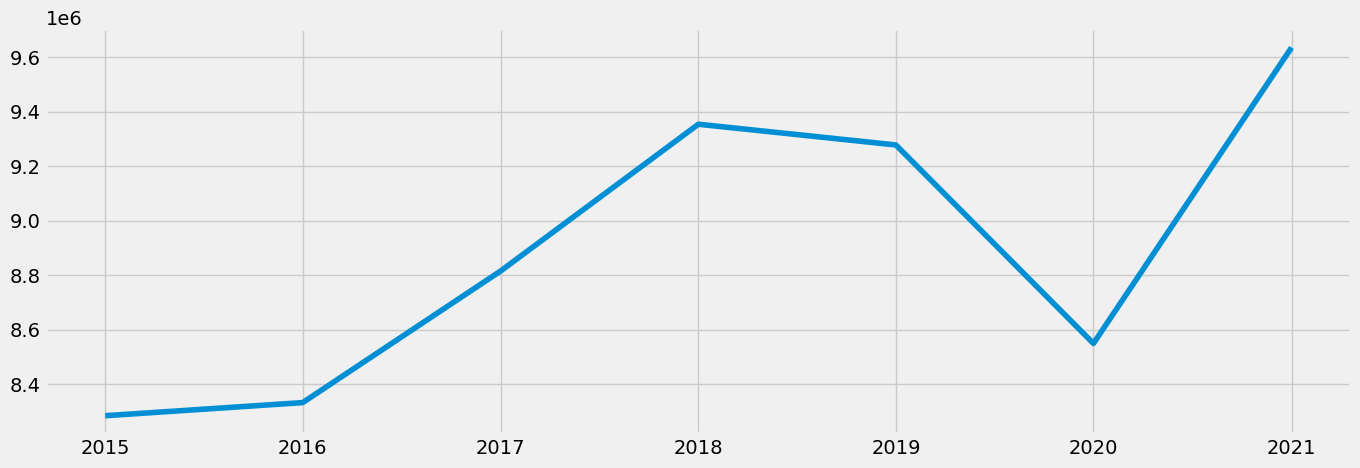

In [26]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 
plt.plot(grouped_by_year_1)

In [27]:
# Check for missing values (you shouldn't have any)

grouped_by_year_1.isnull().sum() 

GDP per capita    0
dtype: int64

## 3. Time-series analysis: decomposition


In [28]:
#Creating a decomposition
decomposition = sm.tsa.seasonal_decompose(grouped_by_year_1, model='additive')

In [29]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

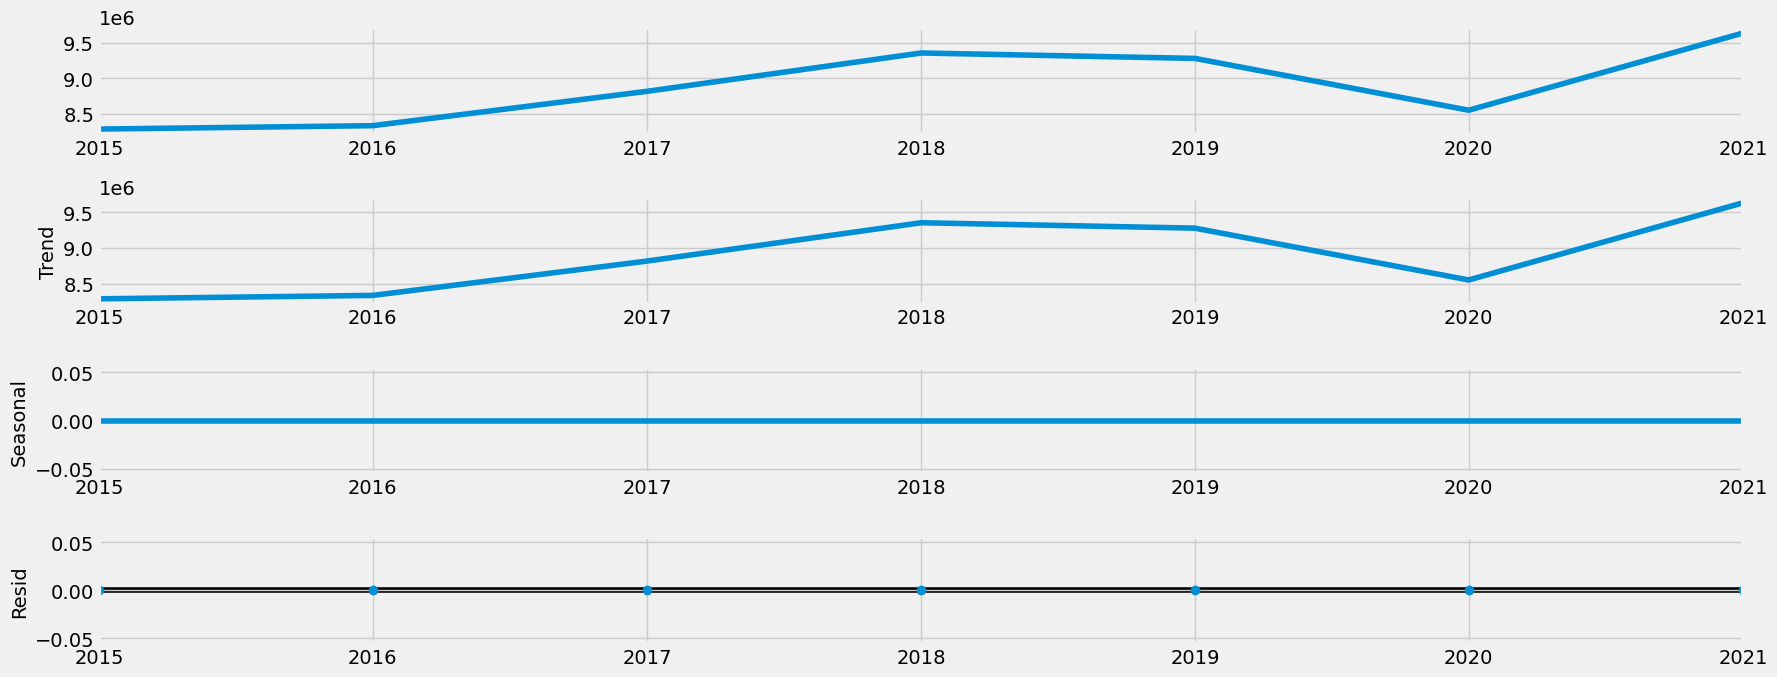

In [30]:
# Plot the separate components

decomposition.plot()
plt.show()

**There is neither trend, nor seasonality or noise in the data.**

## Testing for stationarity

In [32]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(grouped_by_year_1['GDP per capita'])


Dickey-Fuller Stationarity test:
Test Statistic                -1.489511
p-value                        0.538694
Number of Lags Used            0.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


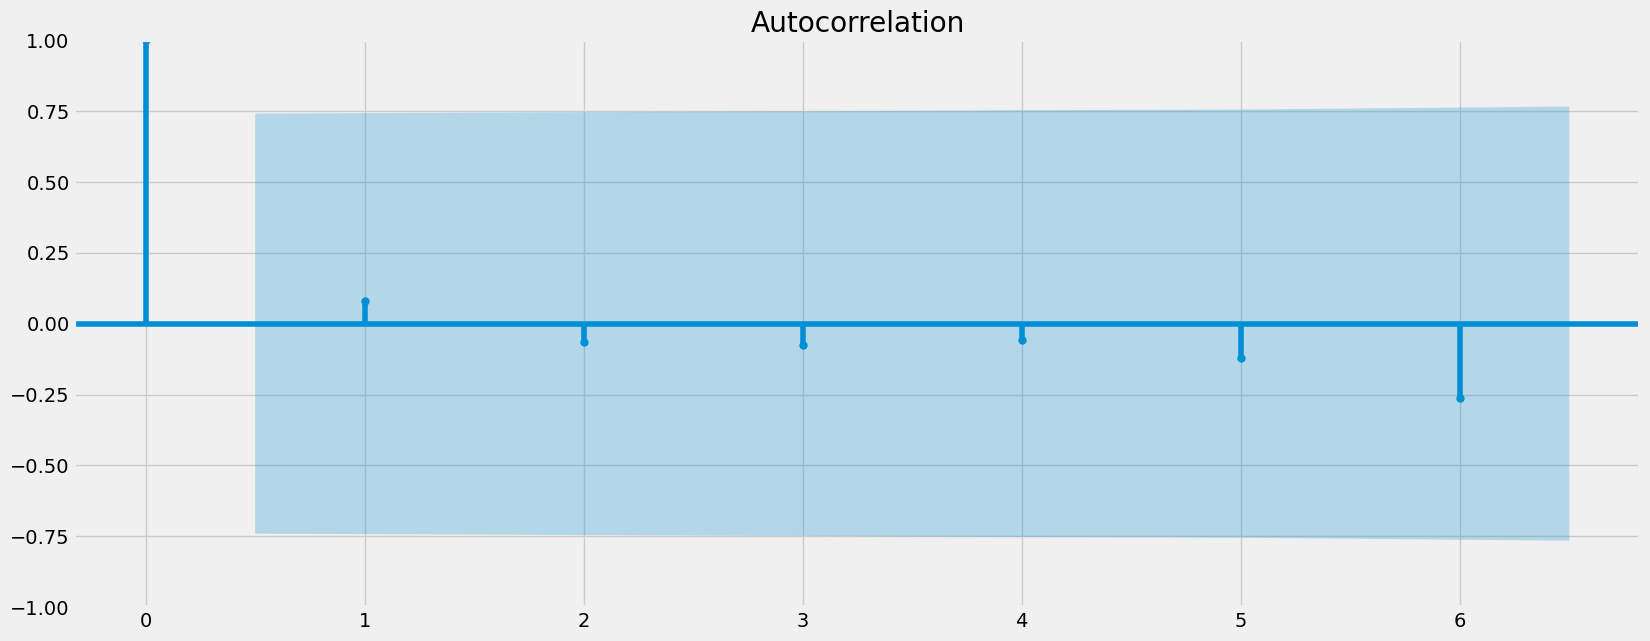

In [33]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(grouped_by_year_1)
plt.show()

**Autocorrelation suggests that the data is quite stationary, as only one lag doesn't fit into the blue area**

## Stationarizing the GDP data

In [38]:
#Using log transformation for stationarizing data
data_diff = grouped_by_year_1 - grouped_by_year_1.shift(1)

In [42]:
data_diff.dropna(inplace = True)

In [43]:
#Result
data_diff

,GDP per capita
Year,
2016-01-01,48180.0
2017-01-01,483609.0
2018-01-01,538272.0
2019-01-01,-76062.0
2020-01-01,-728706.0
2021-01-01,1086294.0


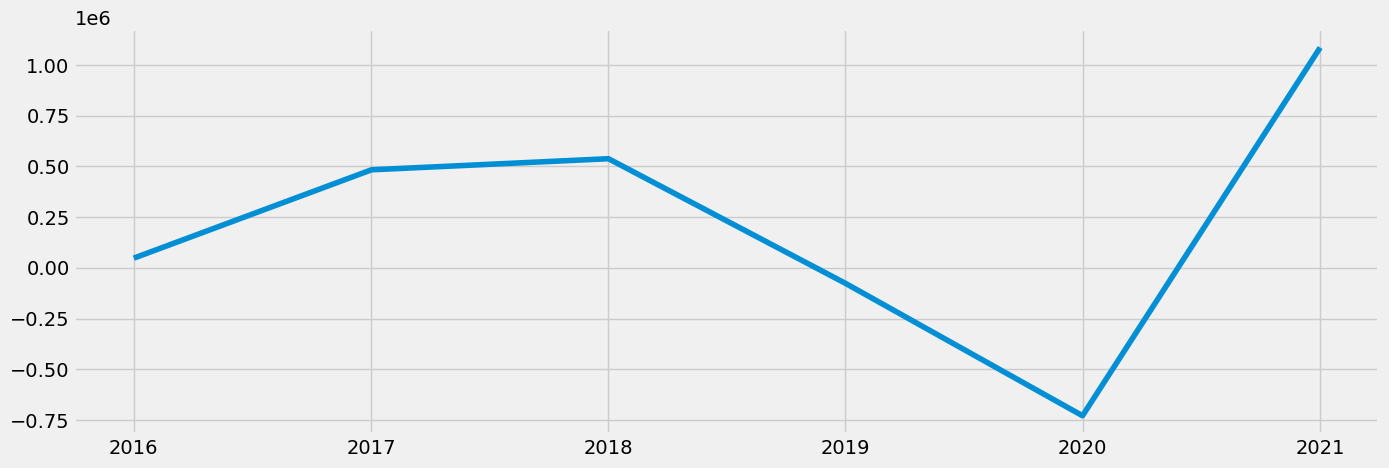

In [44]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [46]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -4.432360
p-value                        0.000260
Number of Lags Used            1.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


**The test statistic got a bit closer to the critical value of 5%. Therefore, I can reject the null hypothesis and, as a result, consider my series stationary**